In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('./bc_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
clms = df.columns
print(clms)
### remove id column and unnamed column
df = df.drop(['id', 'Unnamed: 32'], axis=1)

### checking null values
df.isnull().sum()

### checking info 
df.info()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_m

In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
### rename target column
df = df.rename(columns={'diagnosis': 'target'})
### target column replace with 0 and 1
df['target'] = df['target'].replace({'B': 0, 'M': 1})

C:\Users\goura\AppData\Local\Temp\ipykernel_16716\49258236.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'B': 0, 'M': 1})


C:\Users\goura\AppData\Local\Temp\ipykernel_16716\1245273659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette=colors)


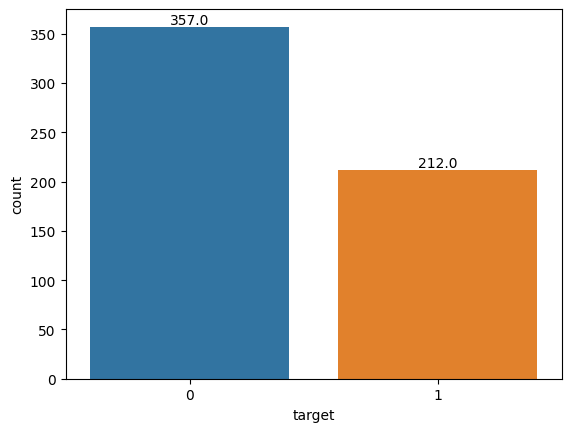

In [6]:
### Define a color palette (you can customize this list of colors)
colors = ["#1f77b4", "#ff7f0e"]

### Create the plot with different colors for each bar
ax = sns.countplot(x='target', data=df, palette=colors)

### Add count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

### Show the plot
plt.show()

In [7]:
### check correlation with target
corr_metrix = df.corr()
corr_metrix['target']*100

target                     100.000000
radius_mean                 73.002851
texture_mean                41.518530
perimeter_mean              74.263553
area_mean                   70.898384
smoothness_mean             35.855997
compactness_mean            59.653368
concavity_mean              69.635971
concave_points_mean         77.661384
symmetry_mean               33.049855
fractal_dimension_mean      -1.283760
radius_se                   56.713382
texture_se                  -0.830333
perimeter_se                55.614070
area_se                     54.823594
smoothness_se               -6.701601
compactness_se              29.299924
concavity_se                25.372977
concave_points_se           40.804233
symmetry_se                 -0.652176
fractal_dimension_se         7.797242
radius_worst                77.645378
texture_worst               45.690282
perimeter_worst             78.291414
area_worst                  73.382503
smoothness_worst            42.146486
compactness_

<Axes: >

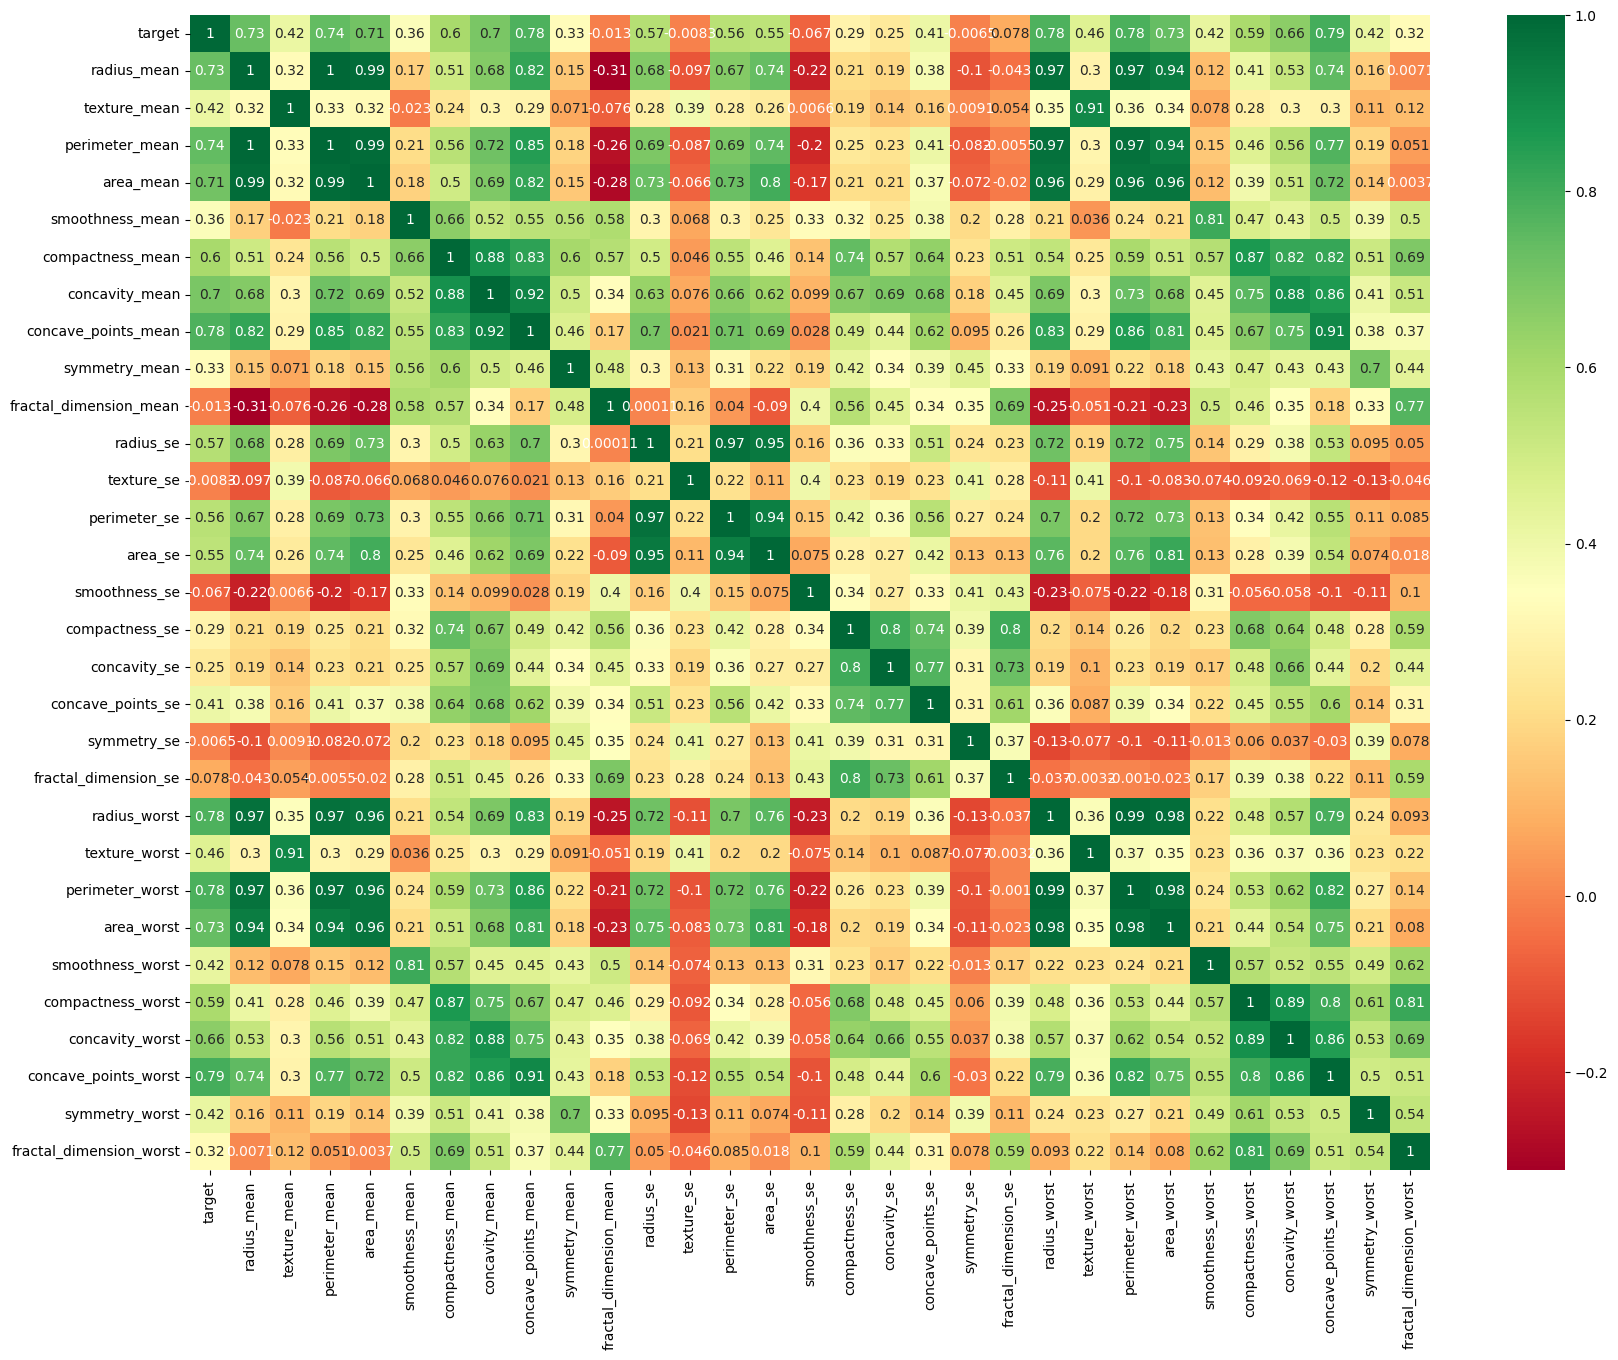

In [8]:
### correlation matrix in heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_metrix, annot=True,cmap='RdYlGn')

In [9]:
### divide dependent and independent variables
x = df.drop(["target"], axis = 1)
y = df.target

In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=10, n_jobs=-1)
x, y = oversample.fit_resample(x, y)

c:\Users\goura\anaconda3\envs\tf\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [11]:
### let's divide train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(len(X_train), len(X_test))
print(len(X_train)+len(X_test))

571 143
714


In [12]:
len(y)
l0, l1 = 0, 0
for i in y:
    if i==0:
        l0 += 1
    else:
        l1 += 1
print(l0,l1)

357 357


In [13]:
### Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_features='sqrt')
rf.fit(X_train,y_train)


rf_train_acc = rf.score(X_train,y_train)*100
rf_test_acc = rf.score(X_test,y_test)*100
print('Training Acc-> ',rf_train_acc)
print('Testing Acc -> ', rf_test_acc)

Training Acc->  99.82486865148861
Testing Acc ->  95.1048951048951


In [14]:
Score = {}
n_estimators = [10,20,30,50,75]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            model.fit(X_train,y_train)
            acc = model.score(X_test,y_test)*100
            Score[n,c,mf] = acc
            
max(Score.values()) # 85.15625
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())

((20, 'entropy', 'sqrt'), 99.3006993006993)

In [15]:
# # hyper parameter tuning of random forest

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)


# from sklearn.model_selection import GridSearchCV
# grid_param = {
#     'n_estimators' : [10,20,30,50,75],
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'max_depth' : [7, 10, 13, 15],
#     'class_weight': ['balanced', 
#                     #  'balanced_subsample'
#                      ],
#     'min_samples_leaf' : [1, 3, 5, 7],
#     'min_samples_split' : [2, 3, 5, 7],
#     'max_features' : ['sqrt', 'log2']
# }

# grid_search_rf = GridSearchCV(rf, grid_param, cv = 5, n_jobs = -1, verbose = 3)
# grid_search_rf.fit(X_train, y_train)



# # best parameters and best score
# print(grid_search_rf.best_params_)
# print(grid_search_rf.best_score_)
# print(grid_search_rf.best_estimator_)

In [16]:
### Random Forest classification after imabalnce and grid search
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',
                            n_estimators=50,
                            criterion='gini',
                            max_depth=10,
                            max_features='sqrt',
                            # min_samples_leaf=3,
                            # min_samples_split=2,
                        )
rf.fit(X_train,y_train)


rf_train_acc = rf.score(X_train,y_train)*100
rf_test_acc = rf.score(X_test,y_test)*100
print('Training Acc-> ',rf_train_acc)
print('Testing Acc -> ', rf_test_acc)

Training Acc->  100.0
Testing Acc ->  97.9020979020979


In [17]:
y_pred = rf.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
cm

[0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1]


array([[63,  1],
       [ 2, 77]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.99      0.97      0.98        79

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



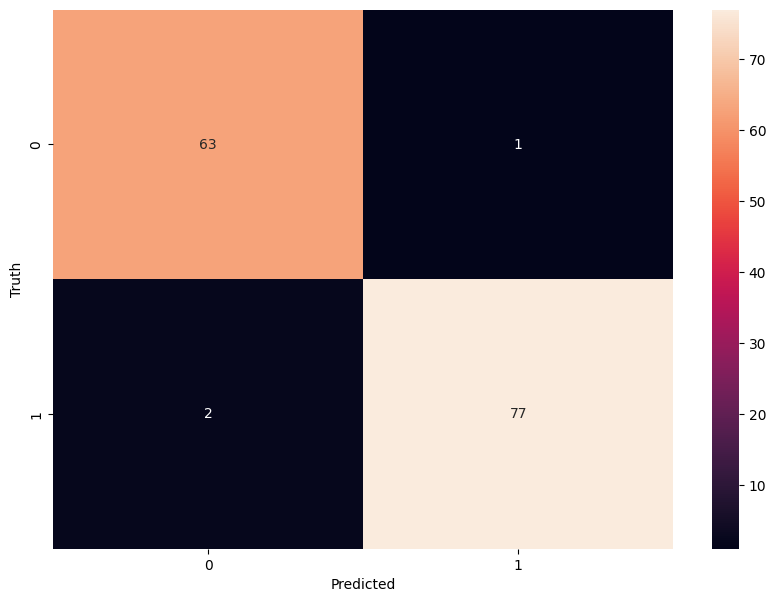

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred))

In [19]:
f1_score = 2*(0.97*1/(0.97+1))
f1_score

0.9847715736040609

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.02097902097902098
mse =>  0.02097902097902098
rmse =>  0.14484136487558028


In [21]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./bc-rf.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

In [22]:
# evaluate model 
# LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
with open(model_pkl_file, 'rb') as file:  
    loaded_rf = pickle.load(file)
    y_pred = loaded_rf.predict(X_test)

    # check results
    pred = loaded_rf.score(X_test, y_test)
    print(f"Accuracy : {pred * 100}%")

Accuracy : 97.9020979020979%
